In [19]:
import os
import pandas as pd
def stack_xlsx_to_single_csv(folder_path, output_csv):
    all_dataframes = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            file_path = os.path.join(folder_path, filename)
            # Read the first sheet of each Excel file
            df = pd.read_excel(file_path, engine='openpyxl')
            # Optionally, add a column to track source file
            df['source_file'] = filename
            if filename != 'Decline Harvesting 202507.xlsx':
                all_dataframes.append(df)
                print(f"Read {filename} with shape {df.shape}")
            else:
                df['Treatment_H2O_Recal'] = '2 - Declined'
                df['Treatment_H2O_202507'] = '1 - Approved' 
                df['Decision'] = 'approved'
                df['Created At'] = None
                df['Treatment_Group'] = None
                df_copy = df[['Subscriber Id', 'Created At', 'Decision', 'Treatment_H2O_Recal', 'Treatment_H2O_202507', 'source_file', 'Treatment_Group']].copy()
                all_dataframes.append(df_copy)
  
    # Concatenate all dataframes row-wise
    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        combined_df.to_csv(output_csv, index=False)
        print(f"Combined CSV saved to: {output_csv}")
    else:
        print("No .xlsx files found in the folder.")

# Example usage
folder_url = '/Users/yaqi.wu/Documents/new_credit_model_champion/data'
output_csv_file = '/Users/yaqi.wu/Documents/new_credit_model_champion/data/conbimed_data.csv'
stack_xlsx_to_single_csv(folder_url, output_csv_file)

Read New Framework Update v20.xlsx with shape (4621, 6)
Read New Framework Update v16.xlsx with shape (3309, 6)
Read New Framework Update v17.xlsx with shape (3651, 6)
Read New Framework Update v21.xlsx with shape (4970, 6)
Read New Framework Update v7.xlsx with shape (796, 6)
Read New Framework Update v10.xlsx with shape (1358, 6)
Read New_Framework_202508.xlsx with shape (100, 5)
Read New Framework Update v11.xlsx with shape (1475, 6)
Read New Framework Update v6.xlsx with shape (674, 6)
Read New Framework Update v12.xlsx with shape (1678, 6)
Read New Framework Update v5.xlsx with shape (542, 6)
Read New Framework Update v9.xlsx with shape (1107, 6)
Read New Framework Update v8.xlsx with shape (1002, 6)
Read New Framework Update v4.xlsx with shape (386, 6)
Read New Framework Update v13.xlsx with shape (2058, 6)
Read New Framework Update v22.xlsx with shape (5334, 6)
Read New Framework Update v18.xlsx with shape (3949, 6)
Read New Framework Update v14.xlsx with shape (2422, 6)
Read Ne

/var/folders/qz/b69jm7mn68g7_wl56km2jbgr0000gp/T/ipykernel_10404/124374259.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_dataframes, ignore_index=True)


## Correlation matrix

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
table = pd.read_csv('../data/threat pocket source.csv')
temp = table[['default_Ind', 
       'bad_credit_Ind', 'accident_Ind', 'badCredit_&_accident',
       'mp_accident_Ind', 'sp_accident_ind', 'co_accident', 
       'First of Tr Error (Subscription_Risk_Master)',
       'Seasoning_week1_accident', 'Total Uncollected Revenue',
       'Seasoning_week1_SingleParty', 'Seasoning_week1_MultiParty',
       'Seasoning_week1_co_accident',
       'Sum of Single Party Accidents (Subscription_Risk_Master)',
       'Sum of Multi Party Accidents (Subscription_Risk_Master)',
       'Sum of Any_Accident_Event (Subscription_Risk_Master)',
       'Sum of Default (Subscription_Risk_Master)',
       'Seasoning_month3_MultiParty', 'Seasoning_month3_SingleParty',
       'Seasoning_month3_accident', 'Seasoning_month3_co_accident',
       'Sum of Seasoning_Month3SingleParty (Subscription_Risk_Master)',
       'Sum of Seasoning_Month3MultiParty (Subscription_Risk_Master)',
       'Sum of Seasoning_Month3AnyAccidentEvent (Subscription_Risk_Master)',
       'Sum of Any_Bad_Credit_Event (Subscription_Risk_Master)']]

corr_table = temp.corr()
corr_table.to_csv("../data/correlation_matrix_v2.csv")

In [ ]:


temp = table[['bad_credit_Ind', 'Seasoning_week1_accident']]
# chi2, p_value, dof, expected = chi2_contingency(temp)
# odds_ratio, p_value_fisher = fisher_exact(temp)

In [85]:
from scipy.stats import chi2_contingency, fisher_exact
p_value_chi2 = []
fisher = []
odds_list = []
cols = [ 
        'accident_Ind', 
       'mp_accident_Ind', 'sp_accident_ind', 'co_accident', 
       'First of Tr Error (Subscription_Risk_Master)',
       'Seasoning_week1_accident', 
       'Seasoning_week1_SingleParty', 'Seasoning_week1_MultiParty',
       'Seasoning_week1_co_accident',
       'Seasoning_month3_MultiParty', 'Seasoning_month3_SingleParty',
       'Seasoning_month3_accident', 'Seasoning_month3_co_accident',
       ]
for col in cols:
    temp = pd.crosstab(table['bad_credit_Ind'], table[col], margins=False)
    chi2, p_value, dof, expected = chi2_contingency(temp)
    # odds_ratio, p_value_fisher = fisher_exact(temp)
    p_value_chi2.append(p_value)
    ct = pd.crosstab(table['bad_credit_Ind'], table[col], margins=False)
    # print(ct)
    try:
        odds = float((ct.iloc[0,0]*ct.iloc[1,1])/(ct.iloc[0,1]*ct.iloc[1,0]))
    except:
        odd = "not data"
    odds_list.append(odds)
    # fisher.append(p_value_fisher)
    

p_vals = pd.DataFrame([cols, odds_list, p_value_chi2]).T
p_vals.columns = ['data item', 'odds ratio', 'p-val']
p_vals.sort_values(by='odds ratio', ascending=False)

,data item,odds ratio,p-val
6,Seasoning_week1_SingleParty,8.227175,0.000165
9,Seasoning_month3_MultiParty,6.976436,0.0
1,mp_accident_Ind,6.621661,0.0
11,Seasoning_month3_accident,5.973707,0.0
0,accident_Ind,5.716981,0.0
3,co_accident,4.773654,0.0
12,Seasoning_month3_co_accident,4.74444,0.000566
10,Seasoning_month3_SingleParty,3.586889,0.0
2,sp_accident_ind,3.300601,0.0
5,Seasoning_week1_accident,2.148453,0.030677


In [86]:
pd.crosstab(table['bad_credit_Ind'], table['accident_Ind'], margins=False)

accident_Ind,0,1
bad_credit_Ind,,
0,34779,1291
1,2587,549


In [58]:
print("Odd ration is:", (34779*549)/(2587*1291))

Odd ration is: 5.716981199868137


In [75]:
ct.iloc[0][0]

np.int64(15451)

## TR Error

In [86]:
TRError = pd.read_csv('../data/TRErrors.csv')
print(TRError.columns)
decision_map = {'approved': 'Approve',
                'Approve':'Approve', 
                'denied': 'Deny', 
                'Deny': 'Deny', 
                'credit_frozen': 'Frozen', 
                'Frozen':'Frozen',
                'step_up_required':'step_up_required'}
TRError['Decision'] = TRError['Decision'].map(decision_map)
# print(TRError.Decision.value_counts(normalize=True).sort_values())

Index(['Subscriber Id', 'Created At', 'Subscriber_RunDate_JoinKey',
       'Footprint Id', 'Decision', 'Workflow Version', 'Response',
       'creditScore', 'TOTALLENGTHOFSVC', 'TotalMinimumPayment', 'TRError',
       'TSVPROJINCOME', 'TSVTOTAL_2YRAGO', 'TSVTOTAL_CURRENT', 'TSVTOTAL_LAST',
       'AutoBalances', 'AutoDebtLoad', 'AutoMinimumPayment',
       'AutoOriginalLoanAmts', 'CCBalances', 'CCDebtLoad', 'CCLimits',
       'CCMinimumPayment', 'ClearID', 'depositAmount', 'DTENDEMPLOYMENT',
       'DTMOSTRECENTHIRE', 'eligibleForNewVehicle', 'FirstPartyFraud',
       'Flexscore', 'fraudVictimIndicator', 'IDTheft',
       'MonthlyPaymentToIncome', 'MortgageBalances', 'MortgageDebtLoad',
       'MortgageMinimumPayment', 'MortgageOriginalLoanAmts', 'override',
       'pricingLimit', 'RiskInform', 'StudentBalances', 'StudentDebtLoad',
       'StudentMinimumPayment', 'StudentOriginalLoanAmts', 'TotalDebtLoad',
       'Sentilink Id', 'Method_Integration', 'Equifax_Integration',
       'TR_I

<Axes: xlabel='Decision'>

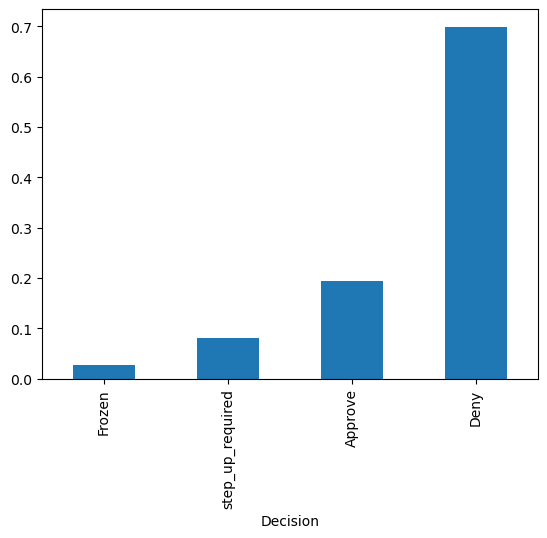

In [87]:
TRError.Decision.value_counts(normalize=True).sort_values().plot(kind='bar')

In [89]:
TRError_deny = TRError[TRError['Decision'] == 'Deny']
print(min(TRError_deny['Created At']))

2024-03-02 07:10:39


In [113]:
TRError[TRError['Subscriber Id'] == '0089422f-456d-4faf-be6c-8943ca666cc8']

,Subscriber Id,Created At,Subscriber_RunDate_JoinKey,Footprint Id,Decision,Workflow Version,Response,creditScore,TOTALLENGTHOFSVC,TotalMinimumPayment,...,TheWorkNumber_Integration,h20_DAI_Integration,h20_PMML_Integration,PMMLFlexscore_Integration,P0_0,AffordabilityTreatment_Integration,predicted_Affordability_Treatment,TreatmentPMML_Integration,predicted_Treatment,TreatmentDAI_Integration
6106,0089422f-456d-4faf-be6c-8943ca666cc8,2024-06-01 18:41:27,0089422f-456d-4faf-be6c-8943ca666cc82024-06-01...,fp_id_t2XeVkVouUKxarVXlAzfAq,Deny,143,"{\n ""errors"": [\n {\n ""code"": 90004,\...",564.0,NaN,0.0,...,none,"{""name"":""h20_DAI_Shapley"",""parameters"":{""credi...","{""name"":""h2o_pmml_5"",""parameters"":{""credit_rep...",NaN,NaN,"{\n ""name"": ""Affordability_Treatment_032824"",...",2 - Declined,"{\n ""name"": ""Treatment_PMML_202312"",\n ""para...",2 - Declined,none


In [100]:
orders = pd.read_csv('../data/Orders Dataset (Ruby Subscriptions).csv')
subscriberId_order = set(orders['Subscriber ID'])
subscriberId_denied = set(TRError_deny['Subscriber Id'])
ids = subscriberId_denied.intersection(subscriberId_order)
print(ids)

{'644225bb-0734-4397-b5d4-06f5452fd899', 'c0b7cd81-c3f7-4420-bf84-1ad505408604', 'e8662409-2492-4d7f-9d18-88416e1943b2', '4da648d3-cf3b-4581-b59f-1ebf21450f7d', '8c1c0856-37de-41f6-b79c-6b52eada3a7f', '7d50006a-ba33-47c0-a44b-cc277a887c80', '35b9158b-1a33-429a-821f-aa916d5631d9', 'a88dca3c-2220-4ee2-9685-178c3ddd2441', '2a25d45c-01f4-4fd0-81a8-a692bc5dd007', '279f9813-0e70-4f7c-9a6d-6f949cc63566', 'ec1ee3a3-8355-4326-a200-d9ca78f38986', '0ee6f71a-6bcd-4e20-85e6-8b6bdd5c99b0', 'cd6a6ac7-9c06-42c2-a656-51d31c749f3e', 'b0061ce2-68d4-47bf-b466-c3f79e774ef4', '02130855-3728-404e-b1e9-186b62a00923', 'a1265cc0-bc24-45f7-a58b-7ea32fe6fbce', '845e5ab5-43ea-4513-a581-fb8ad86ec50e', 'ee4bc878-e1e9-4ece-9571-3a58688a5795', 'f130dc92-f6cc-4d33-b1ff-e1ac835dd0d5', 'f4e747b2-41c8-4897-b53b-d72a2c8c33f9', '5ffd362f-05b4-4422-9d69-69700cf3bda1', '0885d725-d96f-4861-a089-2ed4791860dc', 'c3155542-b4a3-4371-b582-54fa019fc251', 'd309a747-c377-491a-80cf-6aa875c2e5e2', '3e1a899e-c75f-4ecf-9522-5107bbd2a7ad',

In [106]:
cnt = 0
for id in ids:
    if TRError[TRError['Subscriber Id'] == id].shape[0] == 1:
        print(id)
        cnt += 1
print(cnt)

2a25d45c-01f4-4fd0-81a8-a692bc5dd007
0ee6f71a-6bcd-4e20-85e6-8b6bdd5c99b0
cd6a6ac7-9c06-42c2-a656-51d31c749f3e
e96800fa-ecb7-4190-a90f-4da27d113af5
5a278532-b309-4f4a-9c27-665679af23bb
e74c3701-5141-44fa-873e-6fcddc86e9d5
58e91d05-c230-4fce-b11e-1a0fd4f4d179
1d624b7a-c210-46fb-b5be-c0c3196ecfc0
e0dd4a07-9888-4336-92f3-0d6d2b905359
4f4df5ac-497b-46a0-a317-f708b33695d7
662b0e40-7a9e-41c7-a2cf-7b92551aad81
11


In [104]:
TRError[TRError['Subscriber Id'] == '2a25d45c-01f4-4fd0-81a8-a692bc5dd007']

,Subscriber Id,Created At,Subscriber_RunDate_JoinKey,Footprint Id,Decision,Workflow Version,Response,creditScore,TOTALLENGTHOFSVC,TotalMinimumPayment,...,TheWorkNumber_Integration,h20_DAI_Integration,h20_PMML_Integration,PMMLFlexscore_Integration,P0_0,AffordabilityTreatment_Integration,predicted_Affordability_Treatment,TreatmentPMML_Integration,predicted_Treatment,TreatmentDAI_Integration
6610,2a25d45c-01f4-4fd0-81a8-a692bc5dd007,2024-04-03 16:50:27,2a25d45c-01f4-4fd0-81a8-a692bc5dd0072024-04-03...,fp_id_CKQAgd7XQyeMMRdQRd131H,Deny,138,"{\n ""errors"": [\n {\n ""code"": 90003,\...",4.0,NaN,NaN,...,none,"{""name"":""h20_DAI_Shapley"",""response"":{""flexcar...","{""name"":""h2o_pmml_5"",""response"":{""flexcar_h2o_...",NaN,NaN,"{\n ""name"": ""Affordability_Treatment_032824"",...",2 - Declined,"{\n ""name"": ""Treatment_PMML_202312"",\n ""resp...",2 - Declined,none


In [61]:
TRError.head(20).T[30:62]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
fraudVictimIndicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""T""","""T"""
IDTheft,0.0,58.0,0.0,0.0,141.0,0.0,17.0,16.0,0.0,0.0,0.0,27.0,12.0,54.0,241.0,0.0,0.0,0.0,0.0,0.0
MonthlyPaymentToIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MortgageBalances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MortgageDebtLoad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MortgageMinimumPayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MortgageOriginalLoanAmts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
override,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pricingLimit,575.0,575.0,575.0,575.0,575.0,10000.0,10000.0,575.0,575.0,575.0,575.0,10000.0,10000.0,575.0,575.0,10000.0,575.0,575.0,575.0,575.0
RiskInform,0.0,5.0,0.0,10.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,15.0,30.0,10.0,65.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

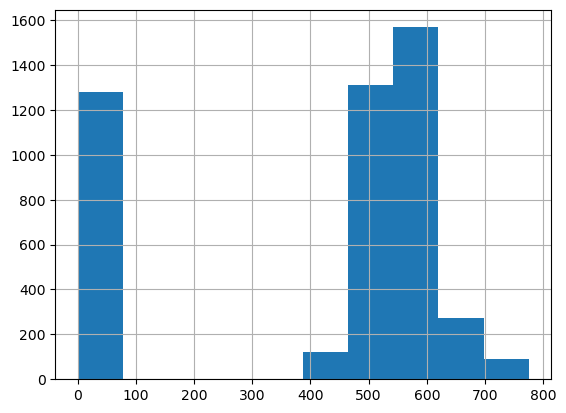

In [ ]:
TRError_deny = TRError[TRError['Decision'] == 'Deny']
TRError_deny['creditScore'].hist()

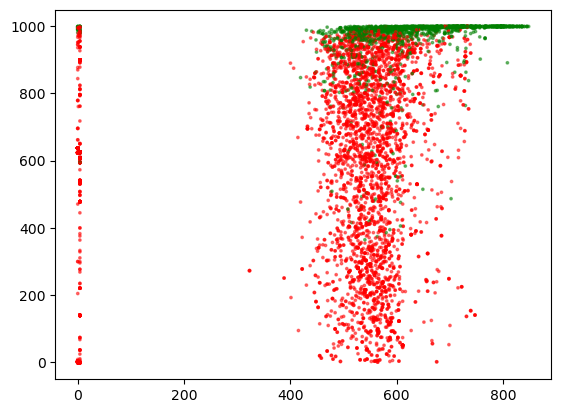

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(TRError_deny['creditScore'], TRError_deny['Flexscore'], s=3, c=TRError_deny['Decision'].map(lambda x: 'green' if x == 'Approve' else 'red'), alpha=0.5)

In [ ]:
import seaborn as sns
TRError_approve = TRError[TRError['Decision'] == 'Approve']
sns.pairplot(TRError_approve[['Decision', 'Flexscore', 'creditScore', 
                            'TSVPROJINCOME', 'TSVTOTAL_2YRAGO', 'TSVTOTAL_CURRENT', 'TSVTOTAL_LAST',
                            'AutoBalances', 'AutoDebtLoad', 'AutoMinimumPayment',
                            'AutoOriginalLoanAmts', 'CCBalances', 'CCDebtLoad', 'CCLimits',
                            'CCMinimumPayment', 'ClearID', 'depositAmount', 'eligibleForNewVehicle', 'FirstPartyFraud',
                            'fraudVictimIndicator', 'IDTheft',
                            'MonthlyPaymentToIncome', 'MortgageBalances', 'MortgageDebtLoad',
                            'MortgageMinimumPayment', 'MortgageOriginalLoanAmts', 'override',
                            'pricingLimit', 'RiskInform', 'StudentBalances', 'StudentDebtLoad',
                            'StudentMinimumPayment', 'StudentOriginalLoanAmts', 'TotalDebtLoad',
                            'predicted_Affordability_Treatment', 'predicted_Treatment']])

In [5]:
import pandas as pd
data = pd.read_csv("../data/incident_train_data/h2o_mp_data_10.6_train.csv")
data['seasoning_3month_sp+mp'].value_counts()

seasoning_3month_sp+mp
2    187
1     96
0      8
3      4
Name: count, dtype: int64

In [14]:
test_predictions = pd.read_csv("../data/h2oai_experiment_incident_v2_custom_dataset_h2o_incident_data_all_10_6_train_csv_predictions.csv")

In [16]:
test_predictions.head()

,seasoning_3month_incident_Ind,seasoning_3month_sp+mp,Subscriber Id_x,Month of Creation Date,Gender First Name Estimated,Num Swaps,Num Maintenance Swaps,Num Preference Swaps,Days Since Last Swap,Days Since First Swap,...,FirstPartyFraud,IDTheft,vehivel_request_fufillment,season,score_basket,score_q1_vs_mean,score_q3_vs_mean,seasoning_3month_incident_Ind.0,seasoning_3month_incident_Ind.1,seasoning_3month_incident_Ind.predicted(th=0.33203)
0,1,2,35410f08-48fe-4073-91b6-32f411442578,1.0,Male,0,0,1,NaN,NaN,...,NaN,NaN,0,Winter,2,-0.062662,0.047338,0.169470,0.830530,1
1,1,2,a07eda21-dec1-443d-83db-6947f9c4f2c8,1.0,Male,0,0,0,NaN,NaN,...,NaN,NaN,0,Winter,2,-0.037956,0.012044,0.118068,0.881932,1
2,1,2,29b44b5e-389c-479a-b207-92d7c3c262d7,8.0,Unknown,0,0,1,NaN,NaN,...,0.0,0.0,1,Summer,2,-0.021655,0.008345,0.989186,0.010813,0
3,1,2,b0cafe5d-61ce-4115-b3a4-c84b92b8e991,4.0,Unknown,0,0,0,NaN,NaN,...,0.0,20.0,0,Spring,2,-0.042263,0.017737,0.539923,0.460077,1
4,1,2,c313ebe7-fd77-47a5-971a-8c3afc38445c,8.0,Male,0,0,1,NaN,NaN,...,0.0,28.0,0,Summer,3,-0.049888,0.010112,0.989739,0.010261,0


In [15]:
test_pred_sorted = test_predictions.sort_values(by='seasoning_3month_incident_Ind.1', ascending=False)

In [12]:
test_pred_sorted[['seasoning_3month_incident_Ind', 'seasoning_3month_incident_Ind.1', 'seasoning_3month_incident_Ind.predicted(th=0.33203)']].head(20)

,seasoning_3month_incident_Ind,seasoning_3month_incident_Ind.1,seasoning_3month_incident_Ind.predicted(th=0.33203)
464,0,0.332899,1
609,0,0.305106,0
2,1,0.194405,0
66,0,0.176429,0
475,1,0.169962,0
1066,0,0.144688,0
450,1,0.140593,0
311,0,0.098254,0
1317,0,0.097282,0
1139,0,0.093994,0
